In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 2.6 MB/s 
     |████████████████████████████████| 9.8 MB 39.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rishiraj-cs/Datasets/master/IBM_stock.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-03-31,153.100006,149.360001,149.789993,151.449997,6780600.0,121.448616
1,2016-04-01,152.960007,150.250000,150.509995,152.520004,3925500.0,122.306641
2,2016-04-04,153.520004,151.910004,152.339996,152.070007,3931200.0,121.945793
3,2016-04-05,151.600006,149.649994,151.429993,150.000000,3337000.0,120.285851
4,2016-04-06,150.149994,147.809998,149.899994,150.020004,4194600.0,120.301880
...,...,...,...,...,...,...,...
1255,2021-03-25,133.240005,129.770004,130.330002,133.070007,5554000.0,133.070007
1256,2021-03-26,136.479996,133.119995,133.289993,136.380005,5562500.0,136.380005
1257,2021-03-29,137.070007,135.509995,135.979996,135.860001,4622700.0,135.860001
1258,2021-03-30,136.270004,134.020004,135.860001,134.720001,4790400.0,134.720001


In [3]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [4]:
from statsmodels.tsa.stattools import adfuller

Text(0, 0.5, 'CLOSE')

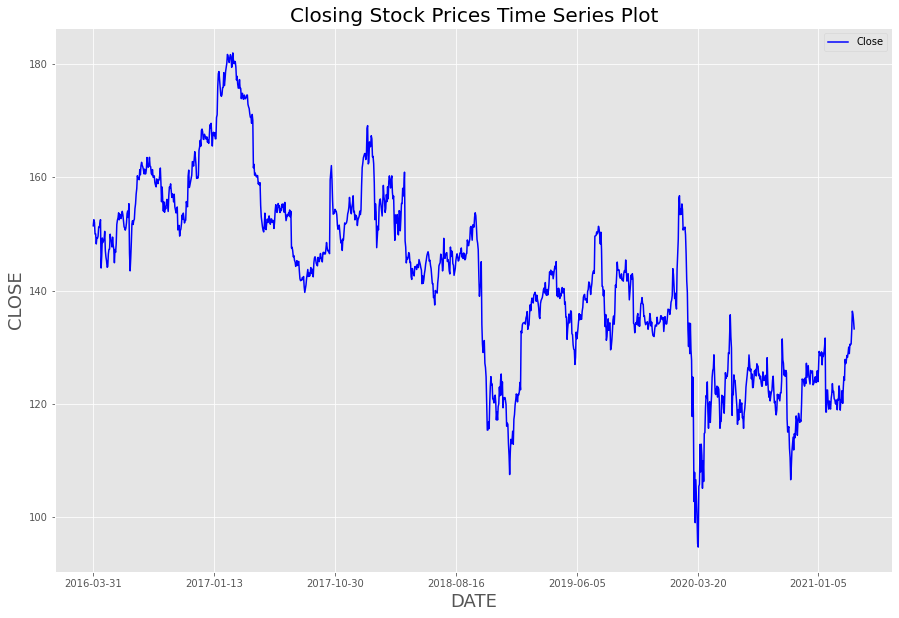

In [5]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
plt.title('Closing Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('CLOSE', size=18)

In [6]:
adFuller = adfuller(df['Close'].values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 0.10304377265854336


In [7]:
df['lag1'] = df['Close'].pct_change(1) 
df['lag2'] = df['Close'].pct_change(2)

Text(0, 0.5, 'lag1')

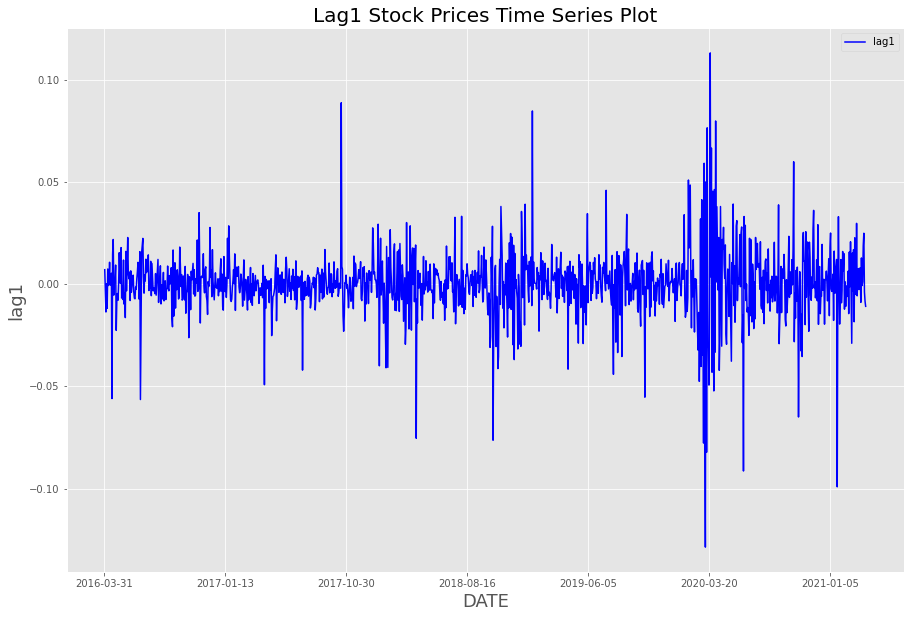

In [8]:
axl = df.plot(kind='line', x='Date', y='lag1', color='blue', figsize=(15, 10))
plt.title('Lag1 Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('lag1', size=18)

In [9]:
adFuller = adfuller(df['lag1'].dropna().values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 3.6523641491651395e-19


Text(0, 0.5, 'lag2')

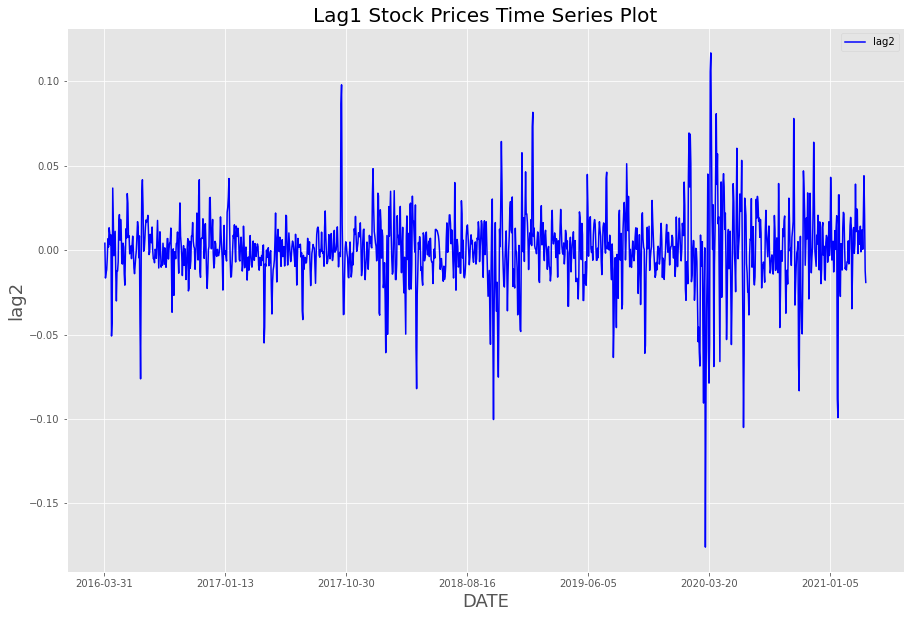

In [10]:
axl = df.plot(kind='line', x='Date', y='lag2', color='blue', figsize=(15, 10))
plt.title('Lag1 Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('lag2', size=18)

In [11]:
adFuller = adfuller(df['lag2'].dropna().values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 3.348288722155967e-15


In [12]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,lag1,lag2
0,2016-03-31,153.100006,149.360001,149.789993,151.449997,6780600.0,121.448616,NaN,NaN
1,2016-04-01,152.960007,150.250000,150.509995,152.520004,3925500.0,122.306641,0.007065,NaN
2,2016-04-04,153.520004,151.910004,152.339996,152.070007,3931200.0,121.945793,-0.002950,0.004094
3,2016-04-05,151.600006,149.649994,151.429993,150.000000,3337000.0,120.285851,-0.013612,-0.016522
4,2016-04-06,150.149994,147.809998,149.899994,150.020004,4194600.0,120.301880,0.000133,-0.013481
...,...,...,...,...,...,...,...,...,...
1255,2021-03-25,133.240005,129.770004,130.330002,133.070007,5554000.0,133.070007,0.018757,0.020006
1256,2021-03-26,136.479996,133.119995,133.289993,136.380005,5562500.0,136.380005,0.024874,0.044097
1257,2021-03-29,137.070007,135.509995,135.979996,135.860001,4622700.0,135.860001,-0.003813,0.020966
1258,2021-03-30,136.270004,134.020004,135.860001,134.720001,4790400.0,134.720001,-0.008391,-0.012172


##ARIMA model

Train and Validation split <br>
The first 80% of the time series (1000 observations) are used as training data. Here is a plot of the autocorrelation function as generated on this training set.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


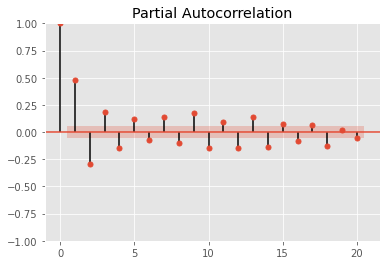

In [13]:
pacf = plot_pacf(df['lag2'].dropna(), lags = 20)

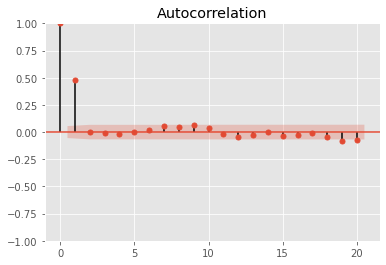

In [15]:
acf = plot_acf(df['lag2'].dropna(), lags = 20)

In [16]:
df = df[['Date', 'Close']]

In [17]:
df.set_index('Date', inplace = True)

In [18]:
df

,Close
Date,
2016-03-31,151.449997
2016-04-01,152.520004
2016-04-04,152.070007
2016-04-05,150.000000
2016-04-06,150.020004
...,...
2021-03-25,133.070007
2021-03-26,136.380005
2021-03-29,135.860001


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'][0:1200], order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1200
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -2621.202
Date:                Thu, 04 Nov 2021   AIC                           5246.405
Time:                        17:54:25   BIC                           5256.582
Sample:                             0   HQIC                          5250.239
                               - 1200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.042    -23.784      0.000      -1.082      -0.917
sigma2         4.6289      0.201     23.017      0.000       4.235       5.023
Ljung-Box (L1) (Q):                   6.08   Jarque-

In [22]:
predict = model_fit.predict(start = 0, end = len(df)-1, dynamic = False)

In [23]:
df['predict'] = predict.values
df

,Close,predict
Date,,
2016-03-31,151.449997,0.000000
2016-04-01,152.520004,227.174995
2016-04-04,152.070007,153.590703
2016-04-05,150.000000,152.380362
2016-04-06,150.020004,149.516903
...,...,...
2021-03-25,133.070007,122.653027
2021-03-26,136.380005,122.630046
2021-03-29,135.860001,122.607064


In [24]:
test = df[1200:]
rmse = sqrt(mean_squared_error(test['Close'], test['predict']))
r2 = r2_score(test['Close'], test['predict'], multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 5.40926487811273, R2_Score = -0.21883544921481815


In [25]:
df.reset_index(inplace = True)
df

,Date,Close,predict
0,2016-03-31,151.449997,0.000000
1,2016-04-01,152.520004,227.174995
2,2016-04-04,152.070007,153.590703
3,2016-04-05,150.000000,152.380362
4,2016-04-06,150.020004,149.516903
...,...,...,...
1255,2021-03-25,133.070007,122.653027
1256,2021-03-26,136.380005,122.630046
1257,2021-03-29,135.860001,122.607064
1258,2021-03-30,134.720001,122.584082


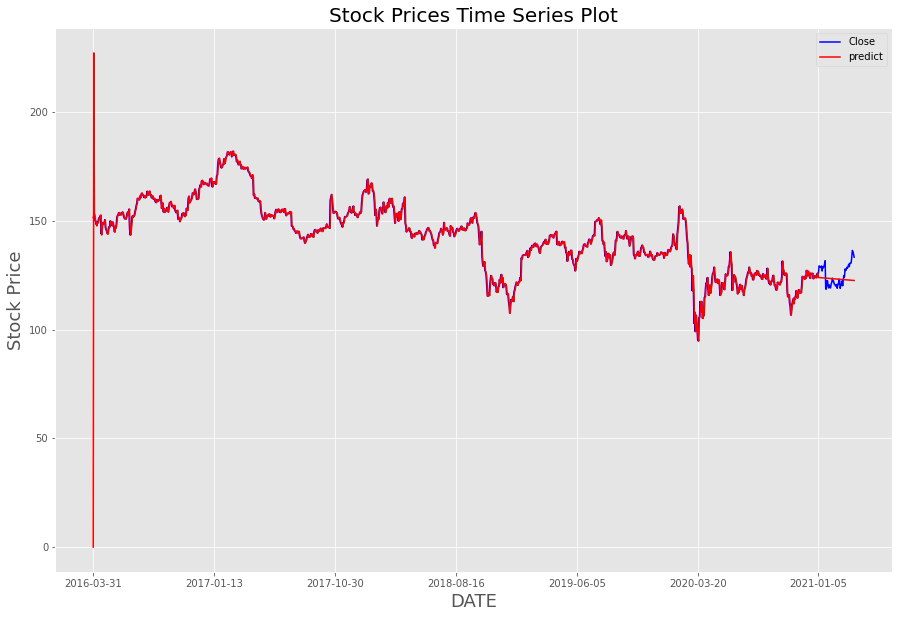

In [26]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
df.plot(kind='line', x='Date', y='predict', color='red', figsize=(15, 10), ax = axl)
plt.title('Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('Stock Price', size=18)
plt.legend()
plt.show()

##LSTM

In [27]:
train = df['Close'][0:1125].values
test = df['Close'][1125:].values

In [28]:
train_size = len(train)
test_size = len(test)

In [29]:
train = np.expand_dims(train,axis=1)
test = np.expand_dims(test,axis=1)

In [30]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [32]:
test = scaler.fit_transform(test)

In [33]:
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [34]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 5) (1119,) (129, 5) (129,)


In [35]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 1, 5) (1119,) (129, 1, 5) (129,)


In [36]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, lookback)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
126/126 - 2s - loss: 0.1083 - val_loss: 0.0029
Epoch 2/100
126/126 - 0s - loss: 0.0047 - val_loss: 0.0068
Epoch 3/100
126/126 - 0s - loss: 0.0037 - val_loss: 0.0054
Epoch 4/100
126/126 - 0s - loss: 0.0032 - val_loss: 0.0042
Epoch 5/100
126/126 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 6/100
126/126 - 0s - loss: 0.0024 - val_loss: 0.0026
Epoch 7/100
126/126 - 0s - loss: 0.0022 - val_loss: 0.0023
Epoch 8/100
126/126 - 0s - loss: 0.0020 - val_loss: 0.0021
Epoch 9/100
126/126 - 0s - loss: 0.0019 - val_loss: 0.0021
Epoch 10/100
126/126 - 0s - loss: 0.0019 - val_loss: 0.0021
Epoch 11/100
126/126 - 0s - loss: 0.0018 - val_loss: 0.0021
Epoch 12/100
126/126 - 0s - loss: 0.0018 - val_loss: 0.0021
Epoch 13/100
126/126 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 14/100
126/126 - 0s - loss: 0.0018 - val_loss: 0.0021
Epoch 15/100
126/126 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 16/100
126/126 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 17/100
126/126 - 0s - loss: 0.0017 - val_lo

dict_keys(['loss', 'val_loss'])


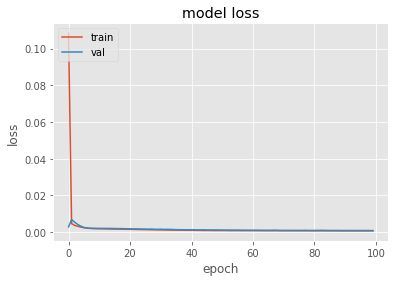

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)
Y_test = scaler.inverse_transform([Y_test])

In [40]:
test_prediction.shape

(129, 1)

In [41]:
Y_test.shape

(1, 129)

In [42]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

No handles with labels found to put in legend.


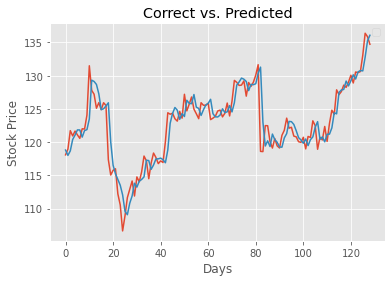

In [43]:
plt.plot(Y_test)
plt.plot(test_prediction)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title("Correct vs. Predicted")
plt.legend()
plt.show()

In [44]:
mse = mean_squared_error(Y_test, test_prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2.351797


##Prophet

In [45]:
pip install fbprophet

In [46]:
from fbprophet import Prophet

In [47]:
my_model = Prophet(interval_width=0.95)

In [48]:
df

,Date,Close,predict
0,2016-03-31,151.449997,0.000000
1,2016-04-01,152.520004,227.174995
2,2016-04-04,152.070007,153.590703
3,2016-04-05,150.000000,152.380362
4,2016-04-06,150.020004,149.516903
...,...,...,...
1255,2021-03-25,133.070007,122.653027
1256,2021-03-26,136.380005,122.630046
1257,2021-03-29,135.860001,122.607064
1258,2021-03-30,134.720001,122.584082


In [49]:
df.drop(columns = ['predict'], inplace = True)
df.columns = ['ds', 'y']

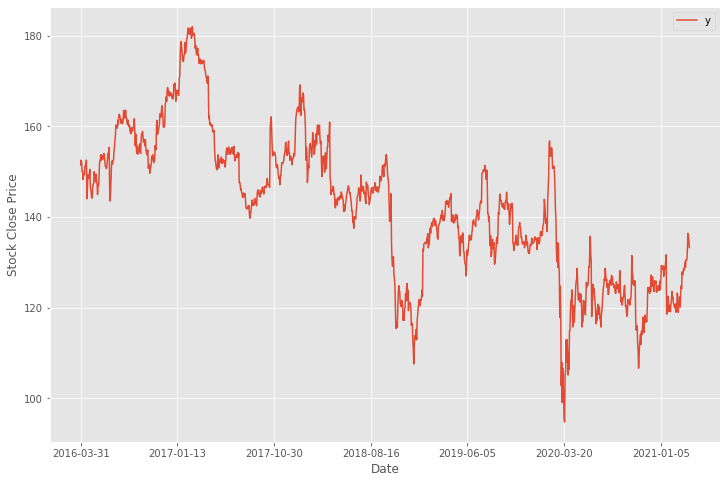

In [50]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Stock Close Price')
ax.set_xlabel('Date')
plt.show()

In [51]:
my_model = Prophet(interval_width=0.95)

In [52]:
train = df[:1125]
test = df[1125:]

In [53]:
my_model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
df

,ds,y
0,2016-03-31,151.449997
1,2016-04-01,152.520004
2,2016-04-04,152.070007
3,2016-04-05,150.000000
4,2016-04-06,150.020004
...,...,...
1255,2021-03-25,133.070007
1256,2021-03-26,136.380005
1257,2021-03-29,135.860001
1258,2021-03-30,134.720001


In [55]:
future_dates = my_model.make_future_dataframe(periods=135, freq='B')
future_dates.tail()

,ds
1255,2021-03-18
1256,2021-03-19
1257,2021-03-22
1258,2021-03-23
1259,2021-03-24


In [56]:
forecast = my_model.predict(future_dates)

In [57]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-31,150.365540,138.220048,160.133835,150.365540,150.365540,-1.390551,-1.390551,-1.390551,-0.011072,-0.011072,-0.011072,-1.379478,-1.379478,-1.379478,0.0,0.0,0.0,148.974990
1,2016-04-01,150.417600,136.975265,160.764076,150.417600,150.417600,-1.242473,-1.242473,-1.242473,-0.146459,-0.146459,-0.146459,-1.096014,-1.096014,-1.096014,0.0,0.0,0.0,149.175126
2,2016-04-04,150.573777,138.079327,161.252829,150.573777,150.573777,-0.313478,-0.313478,-0.313478,-0.001256,-0.001256,-0.001256,-0.312222,-0.312222,-0.312222,0.0,0.0,0.0,150.260299
3,2016-04-05,150.625836,139.281994,162.183002,150.625836,150.625836,0.040121,0.040121,0.040121,0.132975,0.132975,0.132975,-0.092854,-0.092854,-0.092854,0.0,0.0,0.0,150.665957
4,2016-04-06,150.677895,139.831436,161.977934,150.677895,150.677895,0.216378,0.216378,0.216378,0.119060,0.119060,0.119060,0.097318,0.097318,0.097318,0.0,0.0,0.0,150.894273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2021-03-18,109.621928,82.746175,133.628031,86.809386,134.995347,-2.574573,-2.574573,-2.574573,-0.011072,-0.011072,-0.011072,-2.563501,-2.563501,-2.563501,0.0,0.0,0.0,107.047355
1256,2021-03-19,109.569055,81.311900,133.430908,86.449821,135.179467,-2.933057,-2.933057,-2.933057,-0.146459,-0.146459,-0.146459,-2.786598,-2.786598,-2.786598,0.0,0.0,0.0,106.635998
1257,2021-03-22,109.410434,80.031517,135.943559,85.688896,135.471078,-3.083569,-3.083569,-3.083569,-0.001256,-0.001256,-0.001256,-3.082313,-3.082313,-3.082313,0.0,0.0,0.0,106.326865
1258,2021-03-23,109.357561,80.706566,133.165440,85.521063,135.635222,-2.929388,-2.929388,-2.929388,0.132975,0.132975,0.132975,-3.062363,-3.062363,-3.062363,0.0,0.0,0.0,106.428172


In [58]:
predicted = forecast['yhat'][1125:]

In [59]:
from math import sqrt
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 10.488


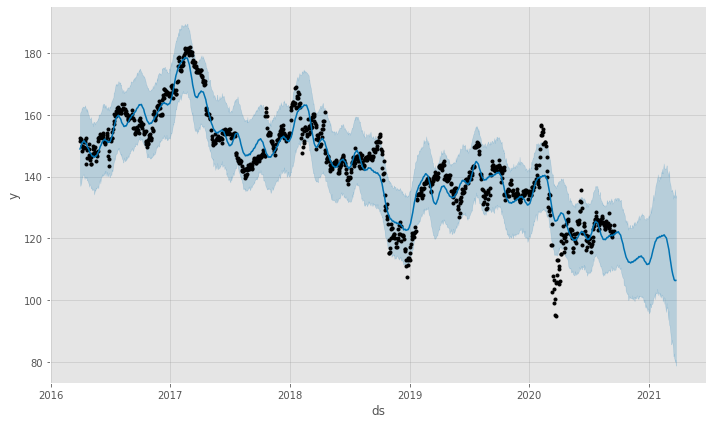

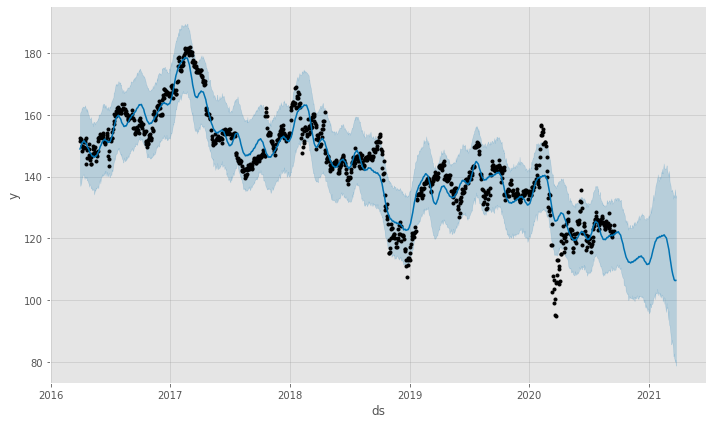

In [60]:
my_model.plot(forecast, uncertainty=True)

#**Conclusion** LSTM Model RMSE is lowest for test dataset. This shows LSTM model best fits the given Stock prices